In [2]:
%run "part01_preprocessing.ipynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Unnamed: 8   0 non-null       float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


# Content

* **Data Preparation**
    - Normalization
    - Standardization
    - Dimensonality
    - Feature Selection
    - Dealing with Outliers

# Data Preparation

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.decomposition import PCA
from umap.umap_ import UMAP
from sklearn.manifold import TSNE

In [4]:
data_prep = data_client_resume.copy()

In [5]:
data_prep.isna().sum()

GrossRevenueTotal    0
RecencyDays          0
Frequency            0
dtype: int64

## Normalization

In [6]:
#sns.pairplot(data_prep, aspect=1.5);

In [7]:
log_columns = data_prep.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]
log_columns

GrossRevenueTotal    21.585393
Frequency            12.045707
RecencyDays           1.249082
dtype: float64

In [8]:
# The log transformations
for col in log_columns.index:
    data_prep[col] = np.log1p(data_prep[col])

## Standardization

In [9]:
#ss = StandardScaler()
#rs = RobustScaler()
#pt = PowerTransformer()

# MinmmaxScaler provides better resutls mainly because is robbust to outliers
mms = MinMaxScaler()

for col in data_prep.columns:
    data_prep[col] = mms.fit_transform(data_prep[[col]]).squeeze()

In [10]:
features = ['GrossRevenueTotal', 'RecencyDays', 'Frequency'] # We will use all features
X = data_prep[features].copy() 

In [11]:
#sns.pairplot(X, aspect=1.5);

## Dimensonality Reduction

In [12]:
clusters_results = X.copy()

In [13]:
# Dimensionality Reduction(to 2D) using technique UMAP 
umap = UMAP(random_state=3456)
umap_embedding = umap.fit_transform(X)

# X,y axis representation for UMAP
clusters_results['umap_x'] = umap_embedding[:,0]
clusters_results['umap_y'] = umap_embedding[:,1]

<AxesSubplot:title={'center':'UMAP'}, xlabel='umap_x', ylabel='umap_y'>

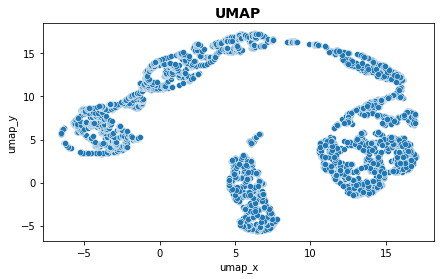

In [21]:
# plt.figure(figsize=(7,4))
# plt.title('UMAP', fontsize='14',fontweight='bold')
# sns.scatterplot(data=clusters_results, x='umap_x', y='umap_y')

In [22]:
# Dimensionality Reduction(to 2D) using technique TSNE
tsne = TSNE(n_components=2, init='pca', learning_rate='auto', n_jobs=-1, random_state=3456)
tsne_embedding = tsne.fit_transform(X)

# X,y axis representation using TSNE
clusters_results['tsne_x'] = tsne_embedding[:,0]
clusters_results['tsne_y'] = tsne_embedding[:,1]

In [24]:
# plt.figure(figsize=(7,4))
# plt.title('UMAP', fontsize='14',fontweight='bold')
# sns.scatterplot(data=clusters_results, x='tsne_x', y='tsne_y')

## Feature Selection

The clustering algorithms do not have automated mechanisms to detect the best features, since in essence they only make groupings according to given variables, looking for similarities between them to form groups. Whether the groups formed are good or bad or have a good explanation for business problems is up to human beings to interpret this. As one of the objectives of this study is to compare the machine learning model with the statistical model, initially we will use the features "GrossRevenueTotal, "RecencyDays", "Frequency" to make a more balanced comparison.

## Dealing with Outliers

Later we will use a clustering algorithm, DBScan, which, in addition to being a classifier, is also an outlier detector.